# Bibliotecas

In [1]:
import warnings
import numpy as np
import random as rnd
from os import listdir
import Contents.Utils as utils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os.path import isfile, join
warnings.filterwarnings("ignore")
from matplotlib.ticker import NullLocator, ScalarFormatter

# Carregando o Banco de Dados

In [2]:
path = 'DataBase/'
files = [f for f in listdir(path) if isfile(join(path,f))]

images_db = []

for file in files:
    images_db.append(mpimg.imread(join(path,file)))

# Selecionando as amostras

In [3]:
SEED = 42

n_samples = 4

rnd.seed(SEED)

samples = rnd.sample(images_db, n_samples)

# Plotando as amostras

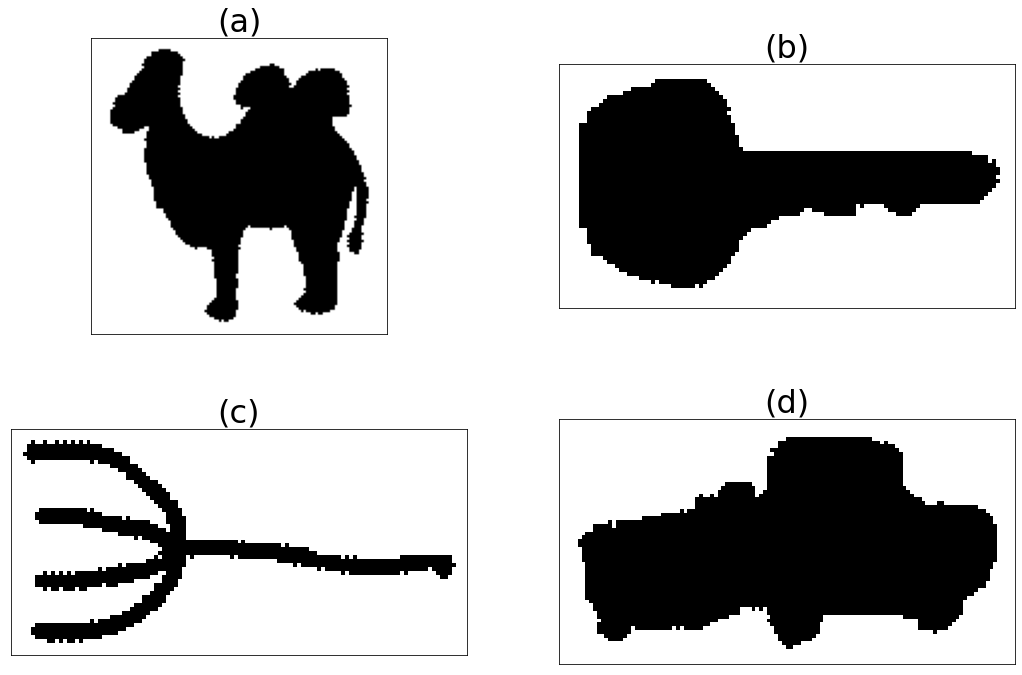

In [4]:
fig, axs = plt.subplots(2,2, figsize = (18,12))

titles = [['(a)', '(b)'], ['(c)', '(d)']]

count = 0

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Plot Data
        
        ax.imshow(samples[count], cmap = 'gray')
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())
        
        # Count
        
        count += 1

# Calculando o valor da orientação do gradiente das bordas

In [5]:
images_theta = []

for sample in samples:
    images_theta.append(
        utils.theta_transform(
            utils.gradient_orientation(sample)))

# Plotando o valor do gradiente

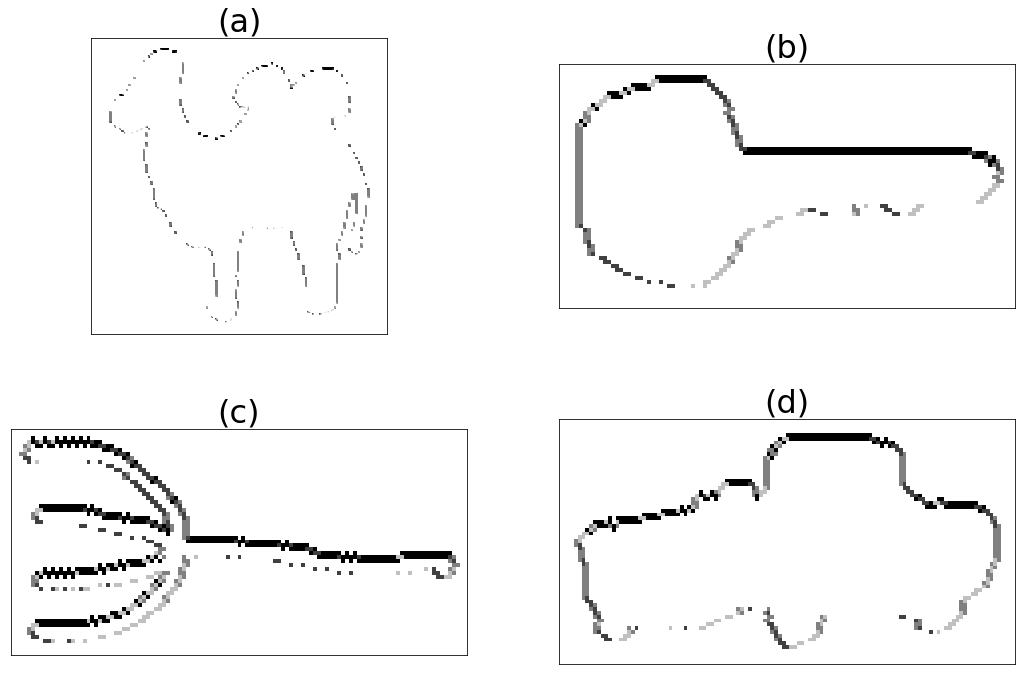

In [6]:
fig, axs = plt.subplots(2,2, figsize = (18,12))

titles = [['(a)', '(b)'], ['(c)', '(d)']]

count = 0

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Plot Data
        
        ax.imshow(images_theta[count], cmap = 'gray')
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())
        
        # Count
        
        count += 1

# Montando os histogramas das amostras

In [7]:
thetas_unique = []
thetas_count_norm = []

for image_theta in images_theta:
    theta_unique, theta_count = utils.theta_counts(image_theta)
    thetas_unique.append(theta_unique)
    thetas_count_norm.append(utils.counts_norm(theta_count))

# Plotando os histogramas das amostras

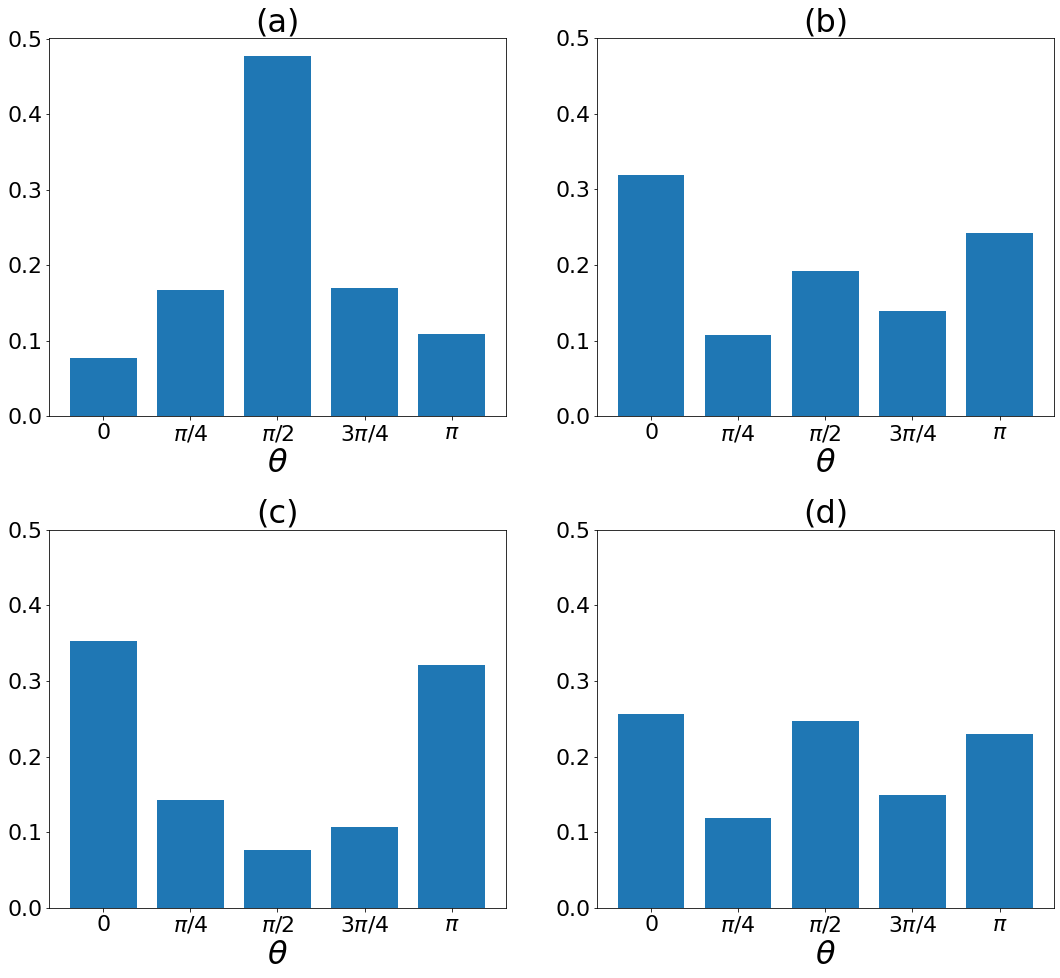

In [8]:
fig, axs = plt.subplots(2,2, figsize = (18,16))

plt.subplots_adjust(wspace = .2, hspace = .3)

titles = [['(a)', '(b)'], ['(c)', '(d)']]

count = 0

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Plot Data
        
        ax.bar(
            x = thetas_unique[count], 
            height = thetas_count_norm[count], 
            width = .6)
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Labels
        
        ax.set_xlabel(r'$\theta$', fontsize = 32)
        
        # Ticks
        
        ax.set_xticks(thetas_unique[count])
        ax.set_yticks([0,.1,.2,.3,.4,.5])
        ax.set_xticklabels(
            ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'], 
            fontsize = 22)
        ax.tick_params(axis = 'y', labelsize = 22)
        
        # Count
        
        count += 1

# Obtendo as estatísticas do Banco de Dados

In [9]:
thetas_count_norm_db = []

for sample in images_db:
    image_theta = utils.theta_transform(utils.gradient_orientation(sample))
    _, theta_count = utils.theta_counts(image_theta)
    thetas_count_norm_db.append(utils.counts_norm(theta_count))

# Query no banco de imagens

In [10]:
queries = []

for sample in samples:
    queries.append(utils.query(sample,thetas_count_norm_db))

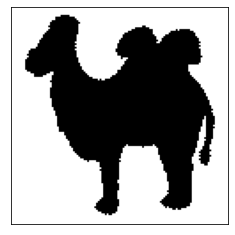

In [11]:
fig, ax = plt.subplots(figsize = (6,4))

ax.imshow(samples[0], cmap = 'gray')

ax.xaxis.set_major_locator(NullLocator())
ax.yaxis.set_major_locator(NullLocator());

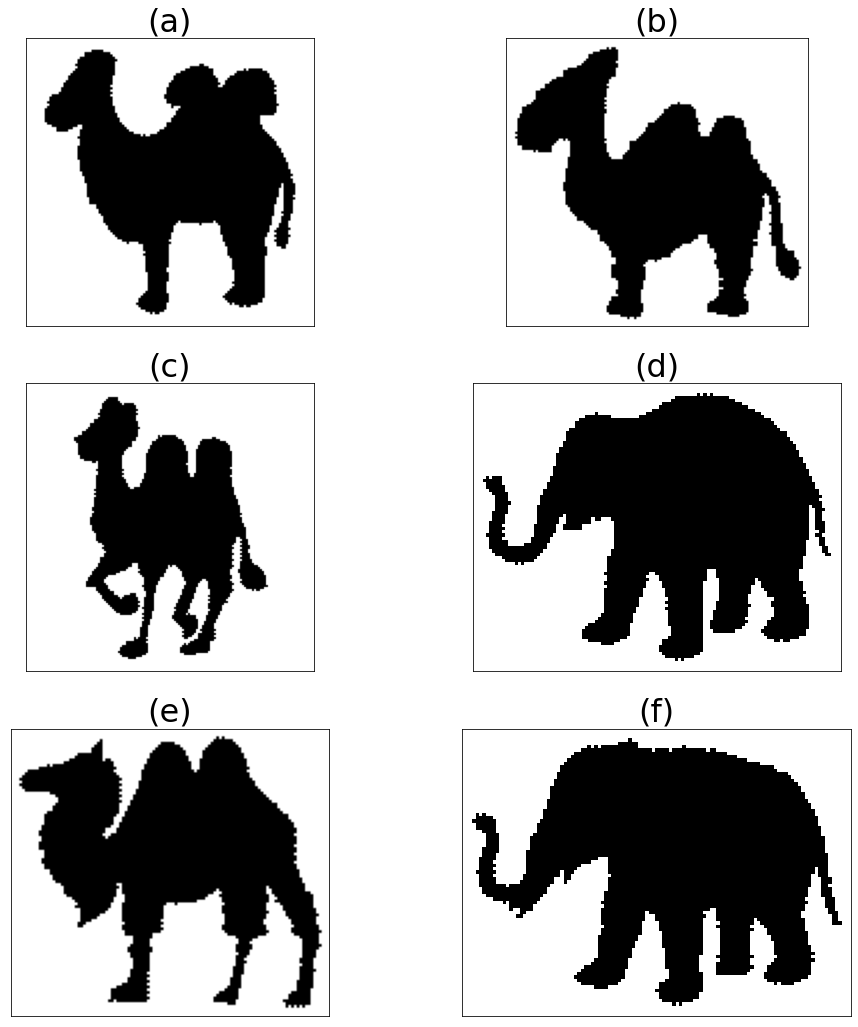

In [12]:
fig, axs = plt.subplots(3,2, figsize = (16,18))

titles = [['(a)', '(b)'], ['(c)', '(d)'],['(e)','(f)']]

count = 0

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Plot Data
        
        ax.imshow(images_db[queries[0][count]], cmap = 'gray')
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())
        
        # Count
        
        count += 1

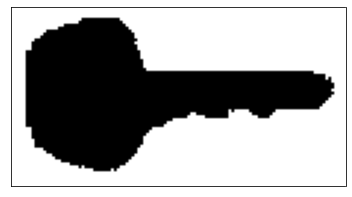

In [13]:
fig, ax = plt.subplots(figsize = (6,4))

ax.imshow(samples[1], cmap = 'gray')

ax.xaxis.set_major_locator(NullLocator())
ax.yaxis.set_major_locator(NullLocator());

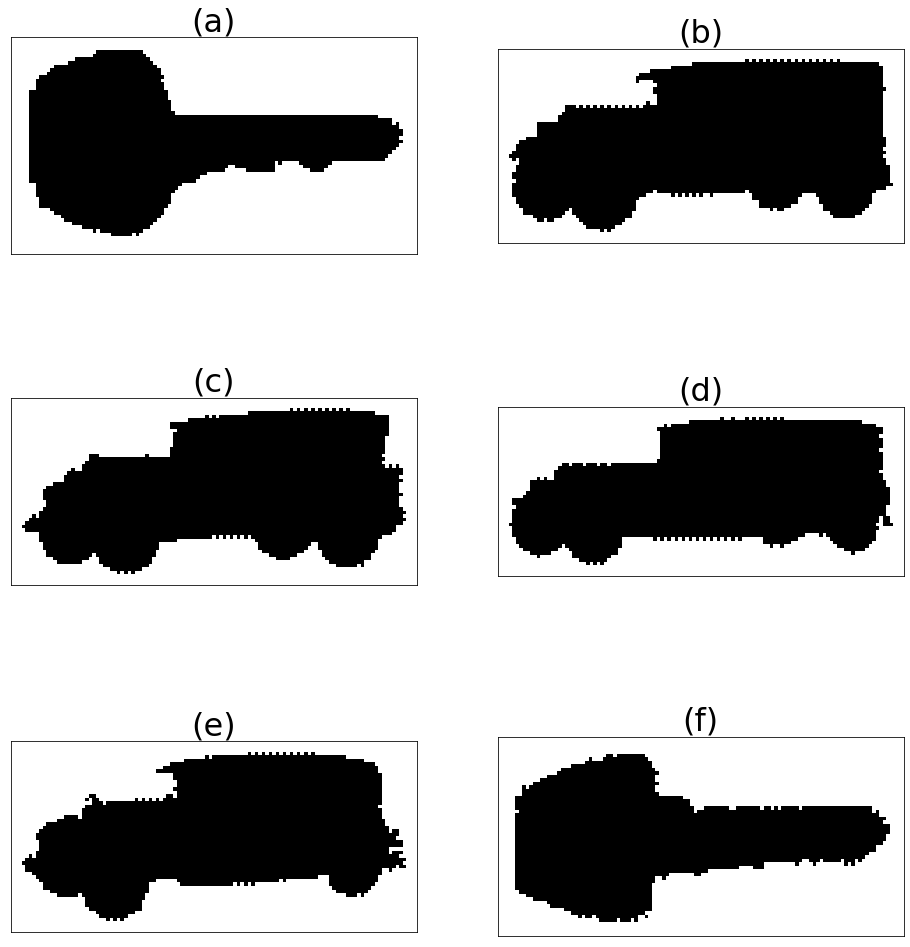

In [14]:
fig, axs = plt.subplots(3,2, figsize = (16,18))

titles = [['(a)', '(b)'], ['(c)', '(d)'],['(e)','(f)']]

count = 0

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Plot Data
        
        ax.imshow(images_db[queries[1][count]], cmap = 'gray')
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())
        
        # Count
        
        count += 1

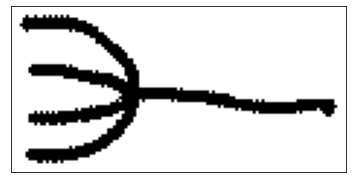

In [15]:
fig, ax = plt.subplots(figsize = (6,4))

ax.imshow(samples[2], cmap = 'gray')

ax.xaxis.set_major_locator(NullLocator())
ax.yaxis.set_major_locator(NullLocator());

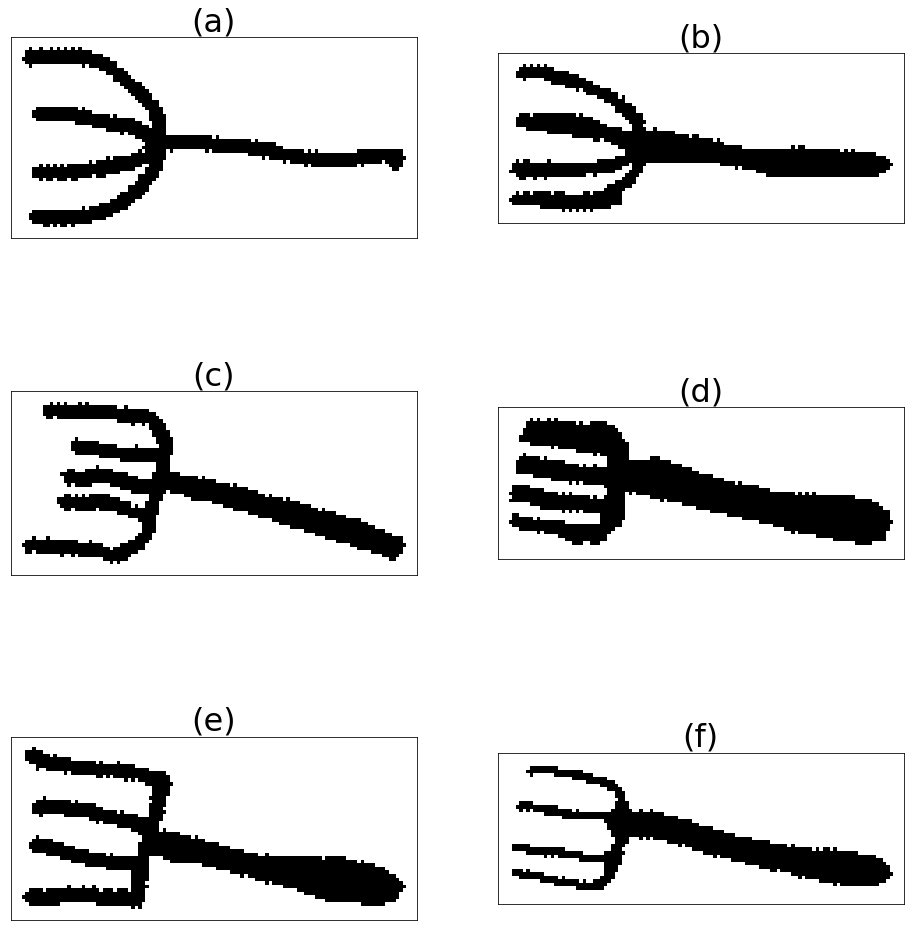

In [16]:
fig, axs = plt.subplots(3,2, figsize = (16,18))

titles = [['(a)', '(b)'], ['(c)', '(d)'],['(e)','(f)']]

count = 0

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Plot Data
        
        ax.imshow(images_db[queries[2][count]], cmap = 'gray')
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())
        
        # Count
        
        count += 1

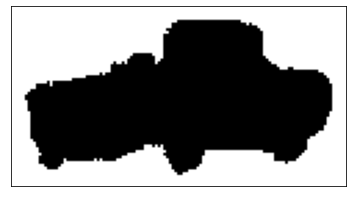

In [17]:
fig, ax = plt.subplots(figsize = (6,4))

ax.imshow(samples[3], cmap = 'gray')

ax.xaxis.set_major_locator(NullLocator())
ax.yaxis.set_major_locator(NullLocator());

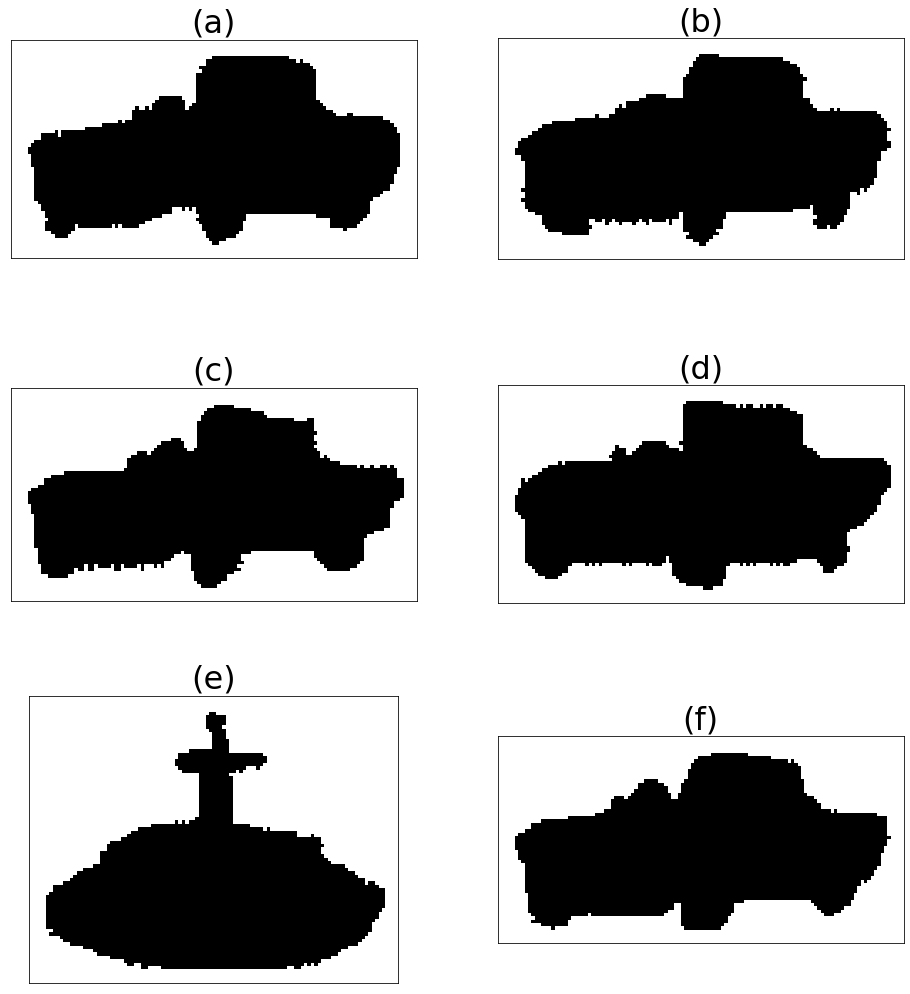

In [18]:
fig, axs = plt.subplots(3,2, figsize = (16,18))

titles = [['(a)', '(b)'], ['(c)', '(d)'],['(e)','(f)']]

count = 0

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Plot Data
        
        ax.imshow(images_db[queries[3][count]], cmap = 'gray')
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())
        
        # Count
        
        count += 1

# Bibliografia